Discentes:
- Elias Nogueira
- Derek 
- João Pedro Nunes

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Atividade para trabalhar o pré-processamento dos dados.

Criação de modelo preditivo para diabetes e envio para verificação de peformance
no servidor.

@author: Aydano Machado <aydano.machado@gmail.com>
"""

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
data = pd.read_csv('diabetes_dataset.csv')


 - Lendo o arquivo com o dataset sobre diabetes


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
567,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
568,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
569,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
570,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


**Ideias:**

- Analisar dados faltantes
- Substituir os dados faltantes
- Normalizar

# Limpeza dos dados

Analisando dados faltantes

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Remoção de dados faltantes reduz muito a quantidade de dados

In [ ]:
data.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
12,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
14,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
15,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
...,...,...,...,...,...,...,...,...,...
553,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0
554,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
558,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
565,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0


In [ ]:
df_clear = data

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot = True, cmap= 'viridis')

NameError: ignored

Optamos por subistituir os dados faltantes pela mediana

In [ ]:
def medianNull(x):
  i = 0
  j = 52
  while(i < 11):
    Median = x[j-52:j].median()
    x.fillna(Median, inplace=True)
    j = j + 52
    i = i + 1

In [ ]:
df_clear = df_clear.sort_values(by='Glucose')
medianNull(df_clear['Insulin'])

df_clear = df_clear.sort_values(by='Insulin')
medianNull(df_clear['Glucose'])

df_clear = df_clear.sort_values(by='BMI')
medianNull(df_clear['SkinThickness'])

df_clear = df_clear.sort_values(by='SkinThickness')
medianNull(df_clear['BMI'])

df_clear = df_clear.sort_values(by='Age')
medianNull(df_clear['BloodPressure'])


#df_clear = df_clear.dropna()

df_clear.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

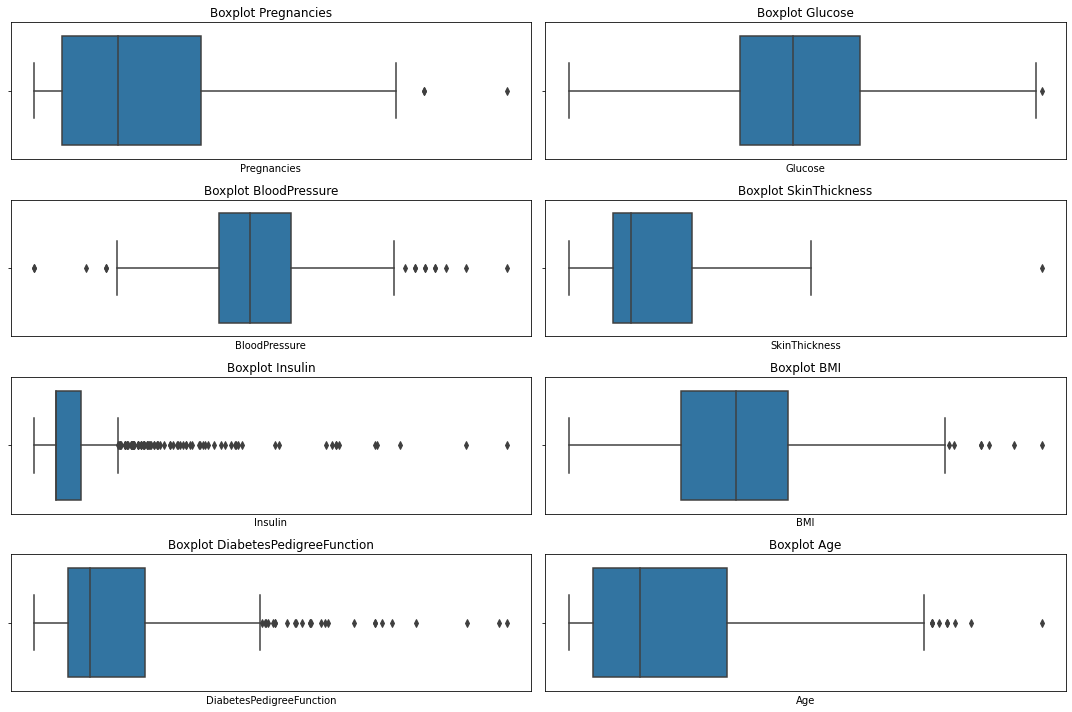

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
colunas = df_clear.columns 

for i, ax in enumerate(axes.flat):
    col = colunas[i]
    sns.boxplot(x=col, data = df_clear, ax = ax)
    ax.set_title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

Normalizando

In [ ]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_clear = minmax_norm(df_clear)

print(df_clear)

     Pregnancies   Glucose  ...       Age  Outcome
376     0.058824  0.554839  ...  0.000000      0.0
209     0.058824  0.174194  ...  0.000000      0.0
425     0.117647  0.477419  ...  0.000000      1.0
389     0.176471  0.277419  ...  0.000000      0.0
120     0.117647  0.361290  ...  0.000000      0.0
..           ...       ...  ...       ...      ...
91      0.294118  0.567742  ...  0.800000      0.0
509     0.294118  0.593548  ...  0.800000      0.0
495     0.235294  0.651613  ...  0.816667      1.0
336     0.117647  0.483871  ...  0.850000      0.0
341     0.529412  0.580645  ...  1.000000      0.0

[572 rows x 9 columns]


# Separando e treinando dados para classificação

In [ ]:
# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta algera o array a seguir.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df_clear[feature_cols]
y = df_clear.Outcome

 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset


In [ ]:
# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

 - Criando modelo preditivo


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('diabetes_app.csv')
data_app = data_app[feature_cols]
y_pred = neigh.predict(data_app)

 - Aplicando modelo e enviando para o servidor


In [ ]:
# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Error 404"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"status":"success","dev_key":"Error 404","accuracy":0.6224489795918368,"old_accuracy":0.64795918367347} 

